## Cleaning data for Question 2(a)

In [1]:
#importing the necessary libraries for question 2 part (a)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
_merged_dataset=pd.read_csv(r"C:\Users\user\Desktop\progdata\mergedata2006n2007.csv")
#import 2006 and 2007 merged dataset to answer this question

In [3]:
_merged_dataset.dtypes
#checking the data types in the merged dataset imported in the cell above

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

In [4]:
_merged_dataset['CRSDepTime'] = _merged_dataset['CRSDepTime'].astype(int)
#changing mereged dataset column CRSDepTime data type to integer to proceed with the question

In [5]:
_merged_dataset.dtypes   #rechecking data types of the merged dataset

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int32
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

### - Cleaning the dataset seperately for Arrival Delay

In [6]:
q2a_arr_dataset=_merged_dataset[["Year","Month","DayOfWeek","CRSDepTime","ArrDelay"]]
# Extracting the desired columns for question 2 part (a) for arrival delay

q2a_arr_dataset.head()

,Year,Month,DayOfWeek,CRSDepTime,ArrDelay
0,2006,1,3,745,6.0
1,2006,1,3,1053,-5.0
2,2006,1,3,1915,-23.0
3,2006,1,3,1755,-8.0
4,2006,1,3,832,0.0


In [7]:
pd.isnull(q2a_arr_dataset).sum(axis=0) #checking for any null values in the dataset 'q2a_arrdataset' 

Year               0
Month              0
DayOfWeek          0
CRSDepTime         0
ArrDelay      316046
dtype: int64

In [8]:
q2a_arr_dataset = q2a_arr_dataset.dropna() 
#dropping the null values in q2a_arrdataset

q2a_arr_dataset.head()

,Year,Month,DayOfWeek,CRSDepTime,ArrDelay
0,2006,1,3,745,6.0
1,2006,1,3,1053,-5.0
2,2006,1,3,1915,-23.0
3,2006,1,3,1755,-8.0
4,2006,1,3,832,0.0


In [9]:
pd.isnull(q2a_arr_dataset).sum(axis=0)
#re-checking for any null values that wasnt removed in above cell

Year          0
Month         0
DayOfWeek     0
CRSDepTime    0
ArrDelay      0
dtype: int64

In [10]:
q2a_arr_dataset = q2a_arr_dataset[q2a_arr_dataset["ArrDelay"] >= 0]
#removing early arrivals from the dataset above 
q2a_arr_dataset.head()

,Year,Month,DayOfWeek,CRSDepTime,ArrDelay
0,2006,1,3,745,6.0
4,2006,1,3,832,0.0
5,2006,1,3,630,2.0
6,2006,1,3,820,20.0
7,2006,1,3,945,7.0


### - Cleaning the dataset seperately for  Departure Delay

In [11]:
q2a_dep_dataset=_merged_dataset[["Year","Month","DayOfWeek","CRSDepTime","DepDelay"]]
#extracting the desired columns for question 2 part (a) for departure delay
q2a_dep_dataset.head()

,Year,Month,DayOfWeek,CRSDepTime,DepDelay
0,2006,1,3,745,-2.0
1,2006,1,3,1053,0.0
2,2006,1,3,1915,0.0
3,2006,1,3,1755,-2.0
4,2006,1,3,832,-8.0


In [12]:
pd.isnull(q2a_dep_dataset).sum(axis=0)
#checking for any null values in q2a_depdataset

Year               0
Month              0
DayOfWeek          0
CRSDepTime         0
DepDelay      282682
dtype: int64

In [13]:
q2a_dep_dataset = q2a_dep_dataset.dropna()
#dropping null values in q2a_depdataset
q2a_dep_dataset.head()

,Year,Month,DayOfWeek,CRSDepTime,DepDelay
0,2006,1,3,745,-2.0
1,2006,1,3,1053,0.0
2,2006,1,3,1915,0.0
3,2006,1,3,1755,-2.0
4,2006,1,3,832,-8.0


In [14]:
pd.isnull(q2a_dep_dataset).sum(axis=0)
#rechecking for any nullvalues that weren't removed

Year          0
Month         0
DayOfWeek     0
CRSDepTime    0
DepDelay      0
dtype: int64

In [15]:
q2a_dep_dataset = q2a_dep_dataset[q2a_dep_dataset["DepDelay"] >= 0]
#removing early departures from the 'q2a_depdataset' dataset 

q2a_dep_dataset.head()

,Year,Month,DayOfWeek,CRSDepTime,DepDelay
1,2006,1,3,1053,0.0
2,2006,1,3,1915,0.0
6,2006,1,3,820,5.0
10,2006,1,3,1835,1.0
13,2006,1,3,1125,0.0


## (i) Analysing the distribution of arrival delay and departure delay variables 

In [16]:
delay_arr=q2a_arr_dataset["ArrDelay"]
      #extracting only the Arrival Delay data

In [17]:
delay_dep=q2a_dep_dataset["DepDelay"]
      #extracting only the Departure Delay data  

In [18]:
delayfor_arr_06 = q2a_arr_dataset[q2a_arr_dataset['Year'] == 2006]['ArrDelay']
delayfor_dep_06 = q2a_dep_dataset[q2a_dep_dataset['Year'] == 2006]['DepDelay']

# Filtering the data needed by year only for the year 2006 

### - Plotting a box plot and a violin plot to show the distributions with outliers included for year 2006

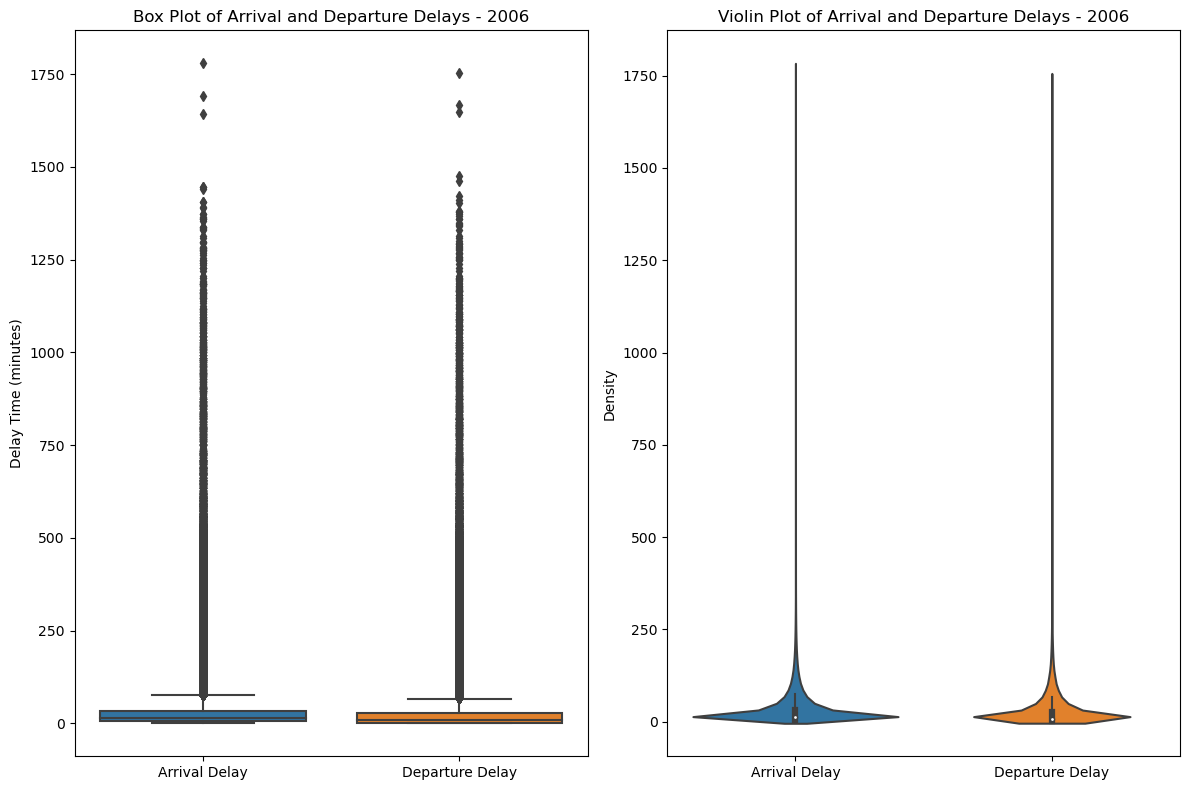

In [19]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=[delayfor_arr_06, delayfor_dep_06], showfliers=True)
plt.xticks(ticks=[0, 1], labels=['Arrival Delay', 'Departure Delay'])
plt.ylabel('Delay Time (minutes)')
plt.title('Box Plot of Arrival and Departure Delays - 2006')
# plotting the Boxplot for year 2006


plt.subplot(1, 2, 2)
sns.violinplot(data=[delayfor_arr_06, delayfor_dep_06])
plt.xticks(ticks=[0, 1], labels=['Arrival Delay', 'Departure Delay'])
plt.ylabel('Density')
plt.title('Violin Plot of Arrival and Departure Delays - 2006')
# Plotting the Violinplot for year 2006

plt.tight_layout()
plt.show()

In [20]:
delayfor_arr_2007 = q2a_arr_dataset[q2a_arr_dataset['Year'] == 2007]['ArrDelay']
delayfor_dep_2007 =q2a_dep_dataset [q2a_dep_dataset['Year'] == 2007]['DepDelay']
# Filtering the data needed by year only for the year 2007

### - Plotting a box plot and a violin plot to show the distributions with outliers included for year 2007

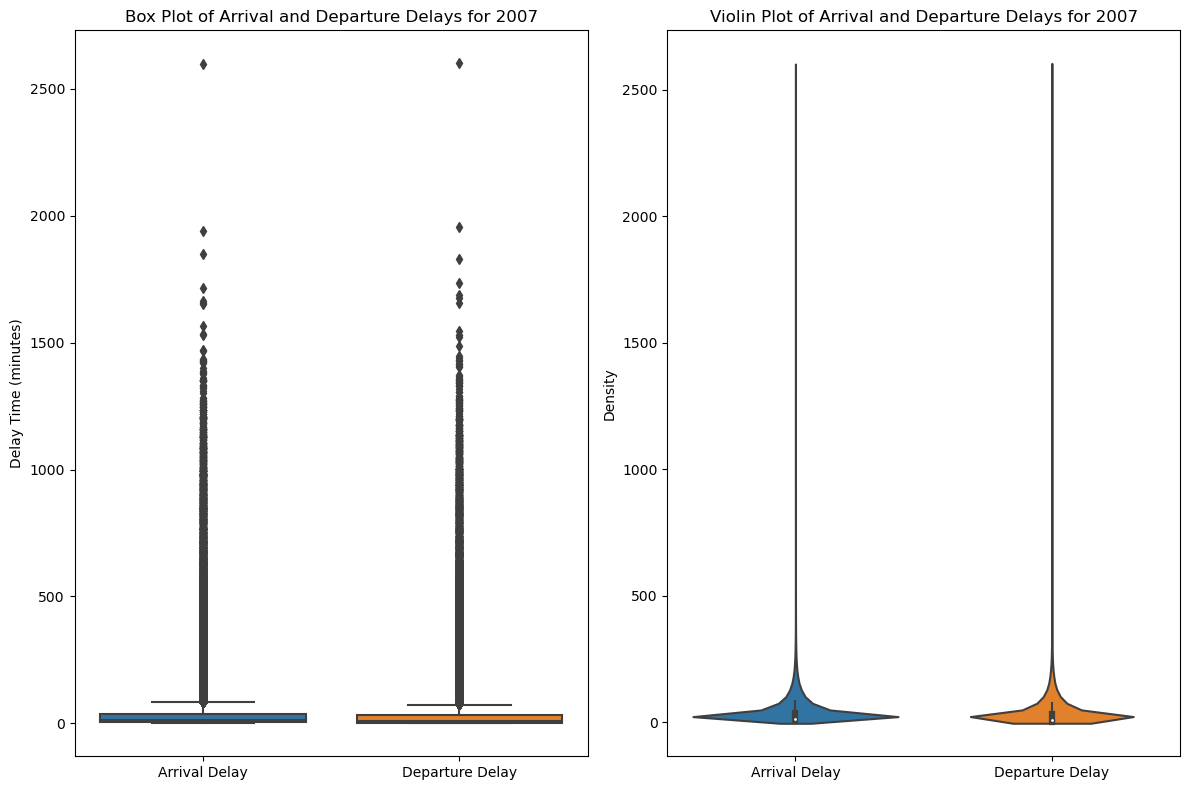

In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=[delayfor_arr_2007, delayfor_dep_2007], showfliers=True)
plt.xticks(ticks=[0, 1], labels=['Arrival Delay', 'Departure Delay'])
plt.ylabel('Delay Time (minutes)')
plt.title('Box Plot of Arrival and Departure Delays for 2007')
# plotting the Box plot for year 2007

plt.subplot(1, 2, 2)
sns.violinplot(data=[delayfor_arr_2007, delayfor_dep_2007])
plt.xticks(ticks=[0, 1], labels=['Arrival Delay', 'Departure Delay'])
plt.ylabel('Density')
plt.title('Violin Plot of Arrival and Departure Delays for 2007')
# plotting the violin plot for year 2006

plt.tight_layout()
plt.show()

### - Comparing the distributions using box plots only by each year for 2006 and 2007

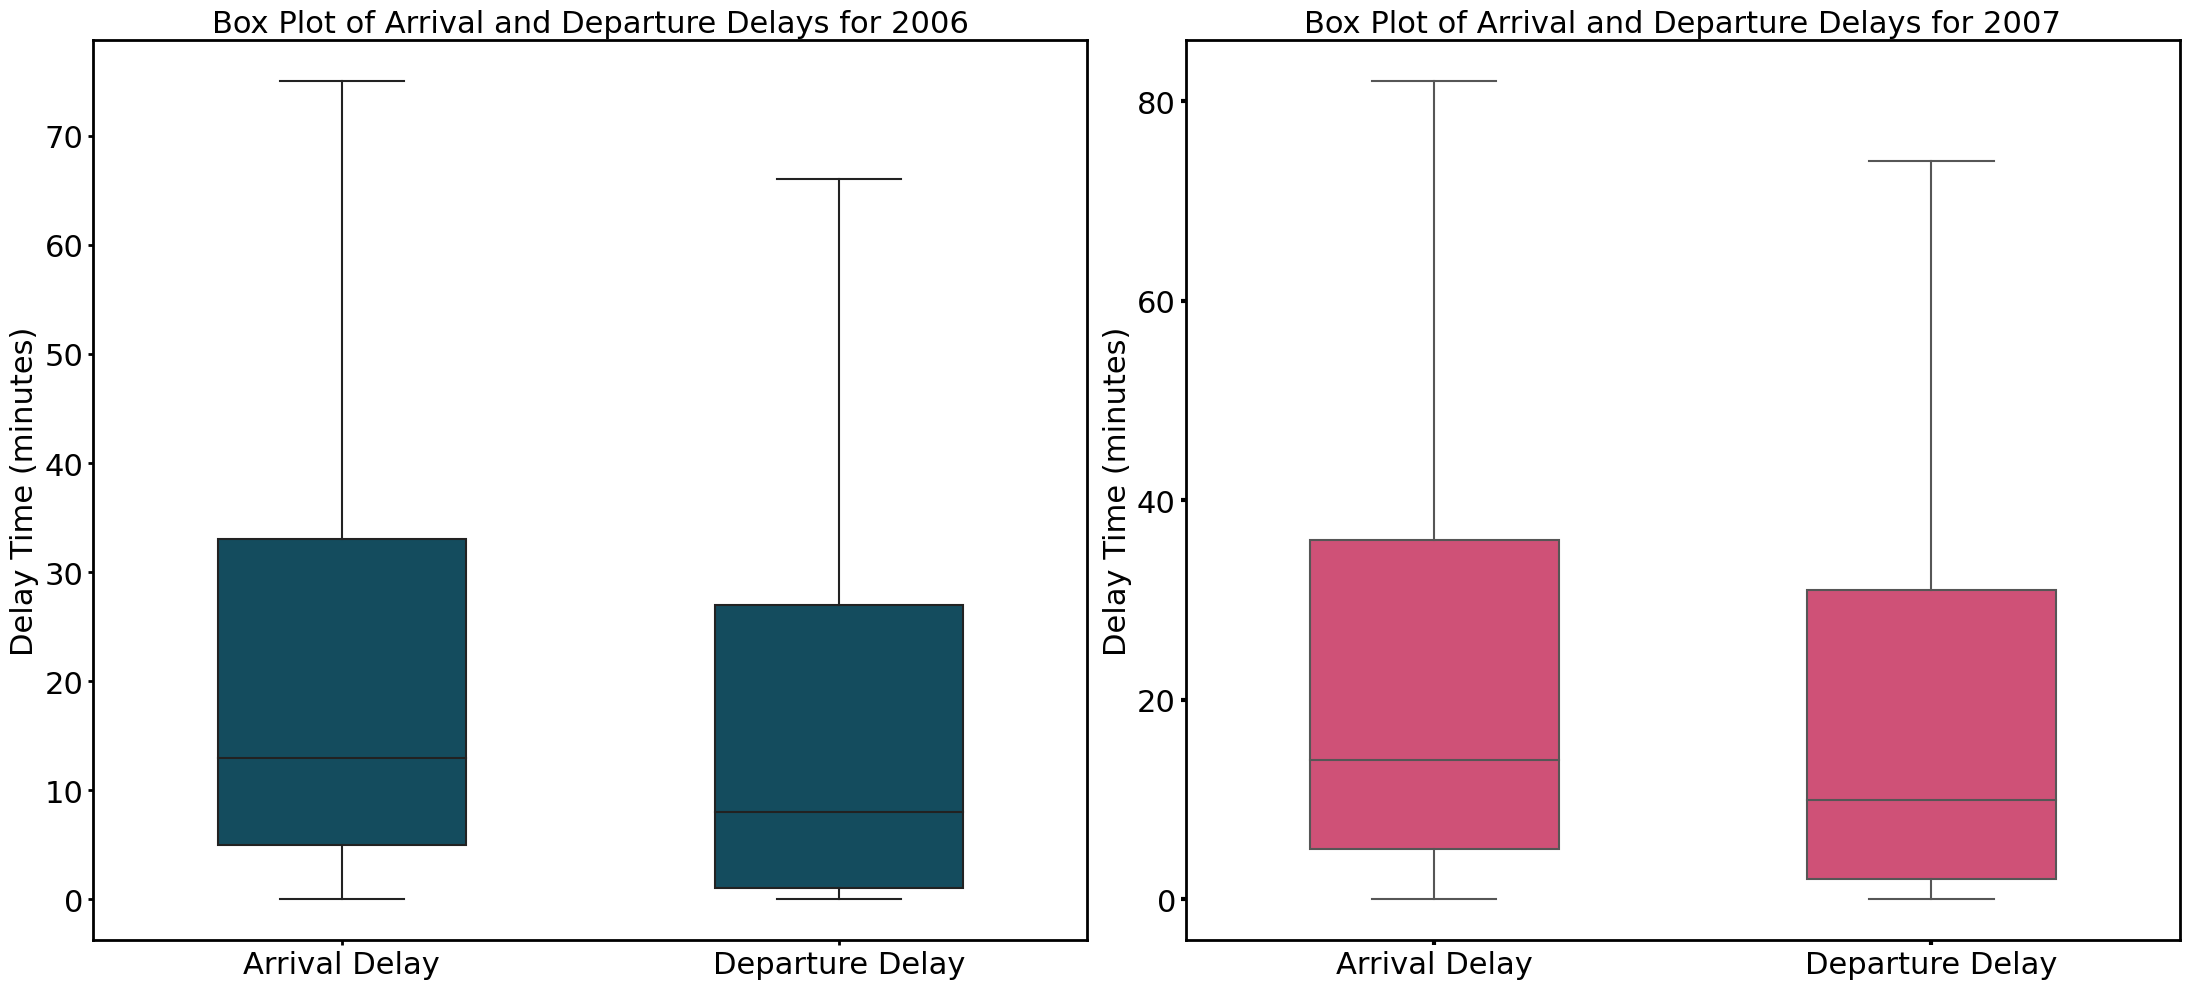

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 10))

# Plot for year 2006
plt.subplot(1, 2, 1)
sns.boxplot(data=[delayfor_arr_06, delayfor_dep_06], showfliers=False, width=0.5, color="#08526A")
plt.xticks(ticks=[0, 1], labels=['Arrival Delay', 'Departure Delay'], fontsize=20)
plt.ylabel('Delay Time (minutes)', fontsize=22)
plt.title('Box Plot of Arrival and Departure Delays for 2006', fontsize=22)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=2, labelsize=22)

# Plot for year 2007
plt.subplot(1, 2, 2)
sns.boxplot(data=[delayfor_arr_2007, delayfor_dep_2007], showfliers=False, width=0.5, color="#e43c6f")
plt.xticks(ticks=[0, 1], labels=['Arrival Delay', 'Departure Delay'], fontsize=20)
plt.ylabel('Delay Time (minutes)', fontsize=22)
plt.title('Box Plot of Arrival and Departure Delays for 2007', fontsize=22)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=3, labelsize=22)

plt.tight_layout()
plt.show()

## (ii) Evaluating the Best time of the day in a week to travel (by hour)

In [23]:
q2a_arr_dataset.loc[:, 'HoursBinned'] = q2a_arr_dataset['CRSDepTime'].apply(lambda x: x // 100)
#Grouping the Scheduled Departure Time into intervals or bins to analyze arrival delays dataset seperately

In [24]:
q2a_arr_dataset.head()

,Year,Month,DayOfWeek,CRSDepTime,ArrDelay,HoursBinned
0,2006,1,3,745,6.0,7
4,2006,1,3,832,0.0,8
5,2006,1,3,630,2.0,6
6,2006,1,3,820,20.0,8
7,2006,1,3,945,7.0,9


In [25]:
q2a_dep_dataset.loc[:,'Hours_Binned'] = q2a_dep_dataset['CRSDepTime'].apply(lambda x:x//100)
#Grouping the Scheduled Departure Time into intervals or bins to analyze departure delays dataset seperately

In [26]:
q2a_dep_dataset.head()

,Year,Month,DayOfWeek,CRSDepTime,DepDelay,Hours_Binned
1,2006,1,3,1053,0.0,10
2,2006,1,3,1915,0.0,19
6,2006,1,3,820,5.0,8
10,2006,1,3,1835,1.0,18
13,2006,1,3,1125,0.0,11


In [27]:
q2a_arr_dataset.dtypes
#checking the data types after binning 

Year             int64
Month            int64
DayOfWeek        int64
CRSDepTime       int32
ArrDelay       float64
HoursBinned      int64
dtype: object

In [28]:
q2a_dep_dataset.dtypes

Year              int64
Month             int64
DayOfWeek         int64
CRSDepTime        int32
DepDelay        float64
Hours_Binned      int64
dtype: object

In [29]:
range = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
labels = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'] 

In [30]:
# stating the range and labels in the above cells for the plot 

In [31]:
q2a_arr_dataset.loc[:, 'CRSDepTime'] = pd.cut(q2a_arr_dataset.CRSDepTime, range, labels=labels).astype('category')

In [32]:
q2a_dep_dataset.loc[:,'CRSDepTime'] = pd.cut(q2a_dep_dataset.CRSDepTime, range, labels=labels).astype('category')

In [33]:
# changing the type of the variable CRSDepTime to category in the above cells for both datasets

In [34]:
q2a_arr_dataset.dtypes
#rechecking data types once again for both datasets

Year              int64
Month             int64
DayOfWeek         int64
CRSDepTime     category
ArrDelay        float64
HoursBinned       int64
dtype: object

In [35]:
q2a_dep_dataset.dtypes

Year               int64
Month              int64
DayOfWeek          int64
CRSDepTime      category
DepDelay         float64
Hours_Binned       int64
dtype: object

- developing a line graph seperately for median arrival delay, departure delay and total delay 

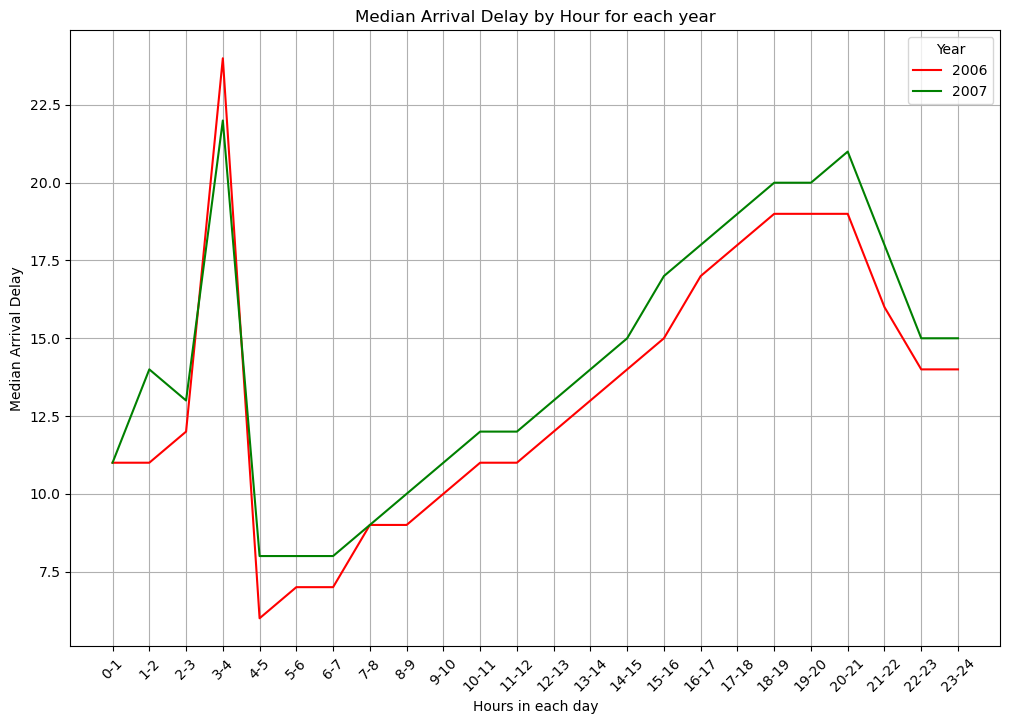

In [36]:
years = q2a_arr_dataset['Year'].unique()

plt.figure(figsize=(12, 8))

for year in years:
    arr_datayearly = q2a_arr_dataset[q2a_arr_dataset['Year'] == year]
    median_arrdelay_byhr = arr_datayearly.groupby('CRSDepTime')['ArrDelay'].median()
    color = 'red' if year == 2006 else 'green' 
    plt.plot(median_arrdelay_byhr.index, median_arrdelay_byhr.values, label=str(year), color=color)
# Filtering the arrival delay dataset by year 2006 and calculating the median arrival delay for each hour of the day

plt.title('Median Arrival Delay by Hour for each year')
plt.xlabel('Hours in each day')
plt.ylabel('Median Arrival Delay')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

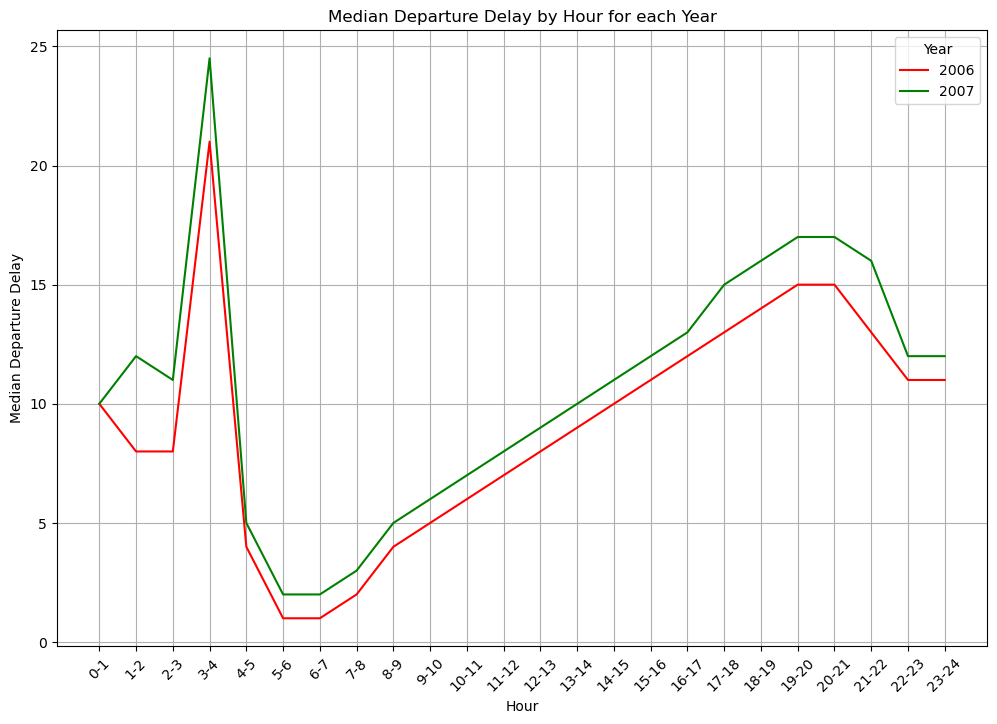

In [37]:
years = q2a_dep_dataset['Year'].unique()

plt.figure(figsize=(12, 8))

for year in years:
    dep_datayearly = q2a_dep_dataset[q2a_dep_dataset['Year'] == year]
    median_depdelay_byhr = dep_datayearly.groupby('CRSDepTime')['DepDelay'].median()
    color = 'red' if year == 2006 else 'green'  
    plt.plot(median_depdelay_byhr.index, median_depdelay_byhr.values, label=str(year), color=color)
    
# Filter the departure delay dataset for each year and calculate the median departure delay for each hour

plt.title('Median Departure Delay by Hour for each Year')
plt.xlabel('Hour')
plt.ylabel('Median Departure Delay')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

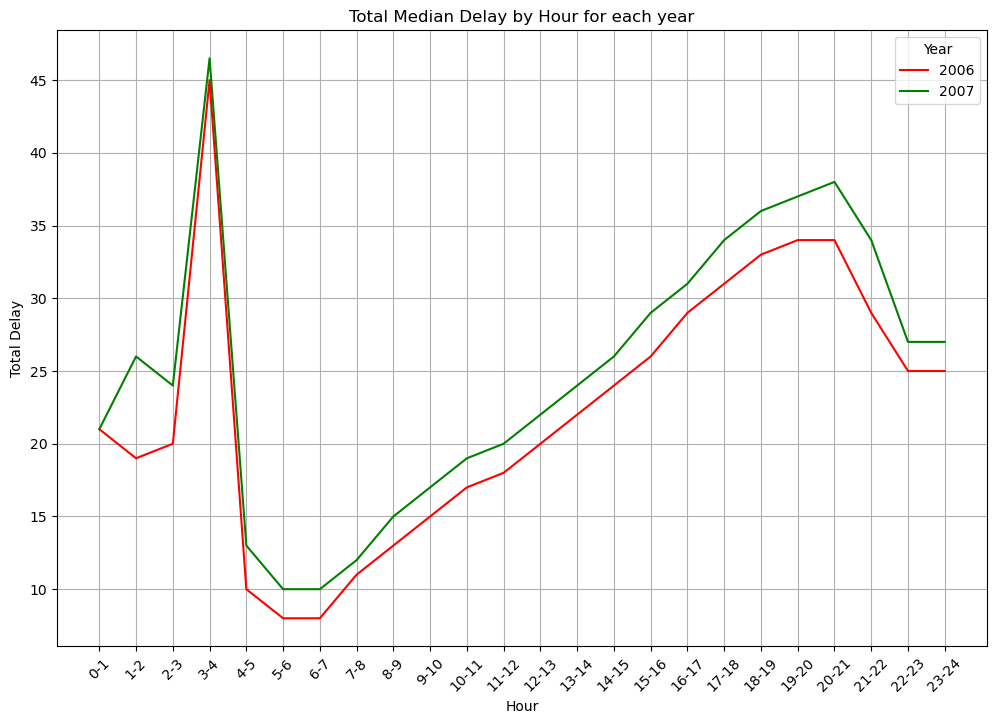

In [38]:
plt.figure(figsize=(12, 8))

for year in years:
    yr_arrivaldata = q2a_arr_dataset[q2a_arr_dataset['Year'] == year]
    yr_departuredata = q2a_dep_dataset[q2a_dep_dataset['Year'] == year]
    tot_delay_byhr = (yr_arrivaldata.groupby('CRSDepTime')['ArrDelay'].median() + 
                           yr_departuredata.groupby('CRSDepTime')['DepDelay'].median())
    color = 'red' if year == 2006 else 'green'  
    plt.plot(tot_delay_byhr.index, tot_delay_byhr.values, label=str(year), color=color)

#plotting a line grapgh to show the total Delay by hour for 2006 and 2007 for each day
    
plt.title('Total Median Delay by Hour for each year')
plt.xlabel('Hour')
plt.ylabel('Total Delay')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()
# Set labels and titleof the graph

## (iii) Analysis for the Best day of the week to travel

- designing barcharts for day of a week against median arrival, departure and total delay times (in minutes) seperately

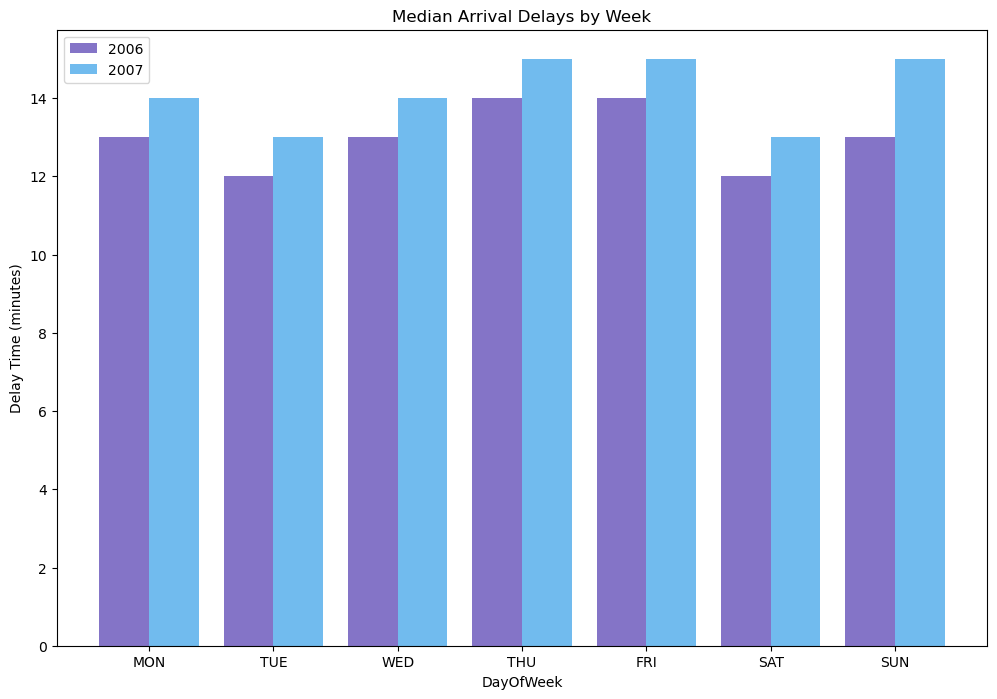

In [39]:
years = q2a_arr_dataset['Year'].unique()

plt.figure(figsize=(12, 8))

for year in years:
    yr_arrdata = q2a_arr_dataset[q2a_arr_dataset['Year'] == year]
    med_arr_delay_byhr = yr_arrdata.groupby('DayOfWeek')['ArrDelay'].median()
    color = '#8474c7' if year == 2006 else '#71bbee'  
    x_values = np.arange(len(med_arr_delay_byhr.index)) + (0.4 if year == 2007 else 0)  
    plt.bar(x_values, med_arr_delay_byhr.values, width=0.4, label=str(year), color=color)
#plotting a barchart for the median arrival delays weekely

plt.xlabel('DayOfWeek')
plt.ylabel('Delay Time (minutes)')
plt.title('Median Arrival Delays by Week')
plt.xticks([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2], ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"])  
plt.legend()
plt.show()
# Set labels and title for the plot

- We can observe that the highest Median Arrival delays for each week in 2006 are from Thursday and Friday. For year 2007, the highest median arrival delays for each week are on Thursday, Friday and Sunday.
- The lowest delays are on tuesday and Saturday for both years.

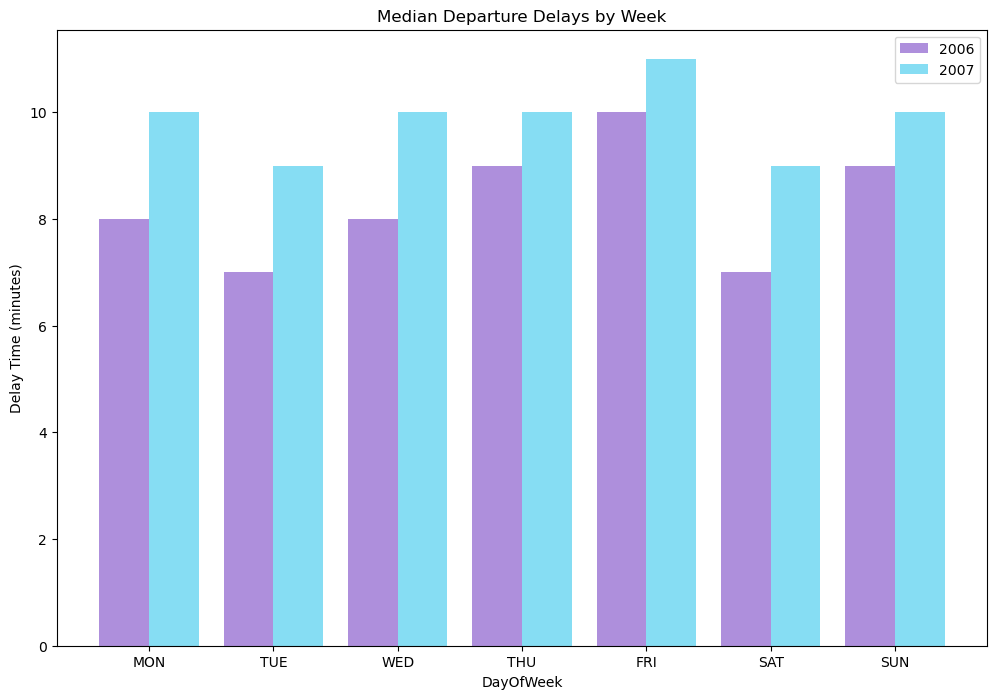

In [40]:
years = q2a_dep_dataset['Year'].unique()

plt.figure(figsize=(12, 8))

for year in years:
    yr_depdata = q2a_dep_dataset[q2a_dep_dataset['Year'] == year]
    med_depdelay_byhr = yr_depdata.groupby('DayOfWeek')['DepDelay'].median()
    color = '#ae8fdc' if year == 2006 else '#86ddf3'  
    x_values = np.arange(len(med_depdelay_byhr.index)) + (0.4 if year == 2007 else 0)  
    plt.bar(x_values, med_depdelay_byhr.values, width=0.4, label=str(year), color=color)
#plotting a barchart for the median departure delays weekely

plt.xlabel('DayOfWeek')
plt.ylabel('Delay Time (minutes)')
plt.title('Median Departure Delays by Week')
plt.xticks([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2], ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"])  
plt.legend()
plt.show()
# Set labels and title for the plot

- We can see that the highest Median Departure Delays for each week is on Friday for both the years and the lowest delays are on tuesday and Saturday for both years.

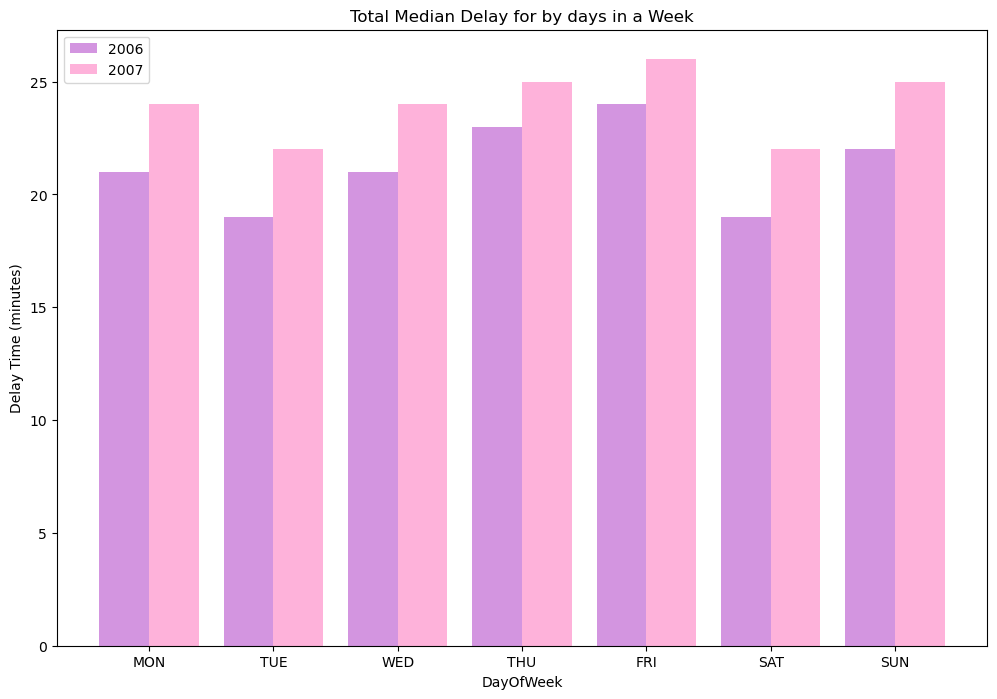

In [41]:
plt.figure(figsize=(12, 8))

for year in years:
    yr_arrdata = q2a_arr_dataset[q2a_arr_dataset['Year'] == year]
    yr_depdata = q2a_dep_dataset[q2a_dep_dataset['Year'] == year]
    tot_delay_byhr = (yr_arrdata.groupby('DayOfWeek')['ArrDelay'].median() + 
                           yr_depdata.groupby('DayOfWeek')['DepDelay'].median())
    color = '#d395e0' if year == 2006 else '#feb2da'  
    x_values = np.arange(len(tot_delay_byhr.index)) + (0.4 if year == 2007 else 0)  
    plt.bar(x_values, tot_delay_byhr.values, width=0.4, label=str(year), color=color)
#plotting a barchart for the total delays weekely    

plt.xlabel('DayOfWeek')
plt.ylabel('Delay Time (minutes)')
plt.title('Total Median Delay for by days in a Week')
plt.xticks([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2], ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"]) 
plt.legend()
plt.show()
# Set labels and title for the plot

- The highest Median Total Delays are for Friday in each week for both years and lowest on Tuesday and Saturday for both years.

## (iv) Analysing the best times of the day to reduce delays  for each week in 2006 and 2007 

In [42]:
days_inweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Defining the days in a week

- We are going to start with plotting line graphs for the Total Median Delay for each day of the week for year 2006 and 2007 seperately.

### - Total Median Delay for each Day of the week 

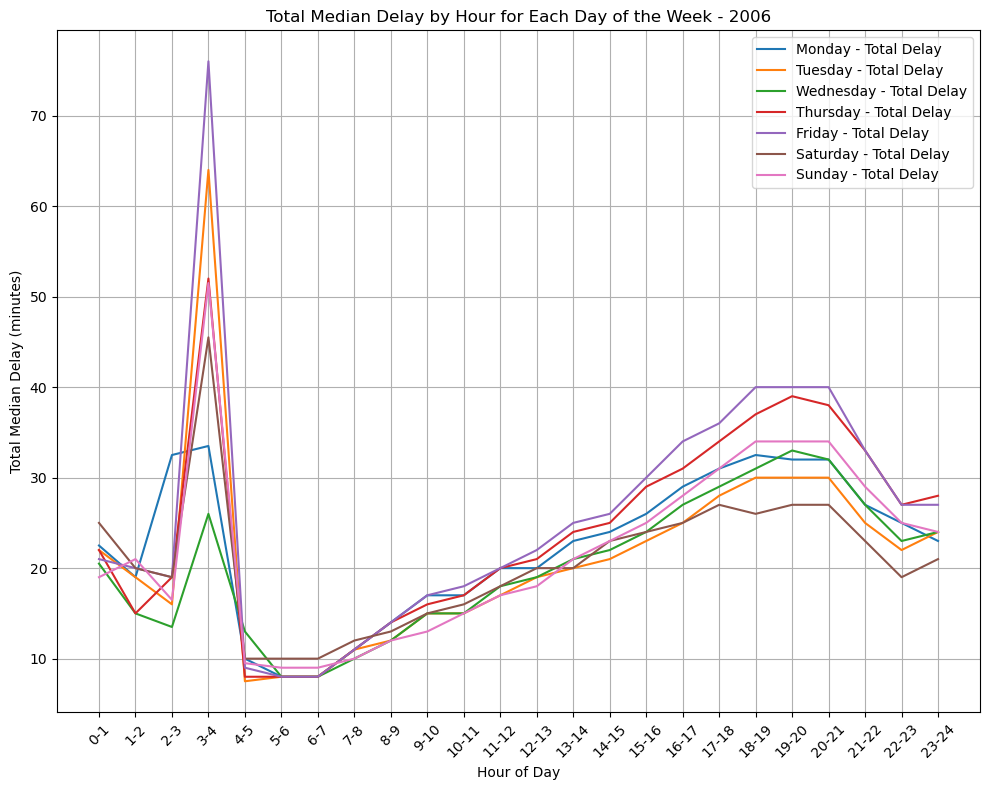

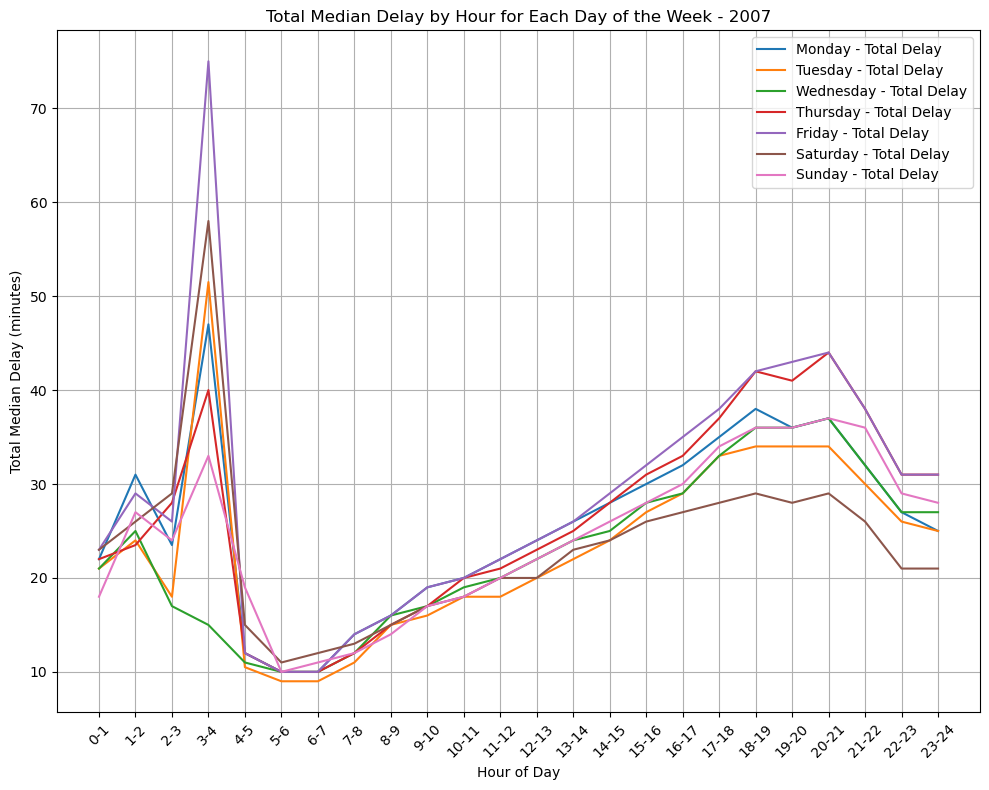

In [43]:
for year in q2a_arr_dataset['Year'].unique():
    plt.figure(figsize=(10, 8))
    # Loop through each year
    
    for i, weekday in enumerate(days_inweek, start=1):
        # Loop through each weekday
        
        yearly_arr = q2a_arr_dataset[(q2a_arr_dataset['Year'] == year) & (q2a_arr_dataset['DayOfWeek'] == i)]
        yearly_dep = q2a_dep_dataset[(q2a_dep_dataset['Year'] == year) & (q2a_dep_dataset['DayOfWeek'] == i)]
        # Filter data for the current year and weekday
        
        median_arrdelay_ = yearly_arr.groupby('CRSDepTime')['ArrDelay'].median()
        # Calculate median arrival delay for each hour
       
        median_depdelay_ = yearly_dep.groupby('CRSDepTime')['DepDelay'].median()
         # Calculate median departure delay for each hour
       
        tot_median_delay_ = median_arrdelay_ + median_depdelay_
         #Calculate total median delay for each hour 
            
        plt.plot(tot_median_delay_.index, tot_median_delay_.values, label=f'{weekday} - Total Delay')
         # Plot total median delay
    
    
    plt.title(f'Total Median Delay by Hour for Each Day of the Week - {year}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Total Median Delay (minutes)')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # Set title and labels

- The above graph shows all the days of each week with their total Median Delays by hour.

- From the Median Arrival Delay and Median Departure Delay bar charts we observed that Tuesday and Saturdays are the best days to minimise delays so for deeper analysis we isolate only tuesdays and Saturdays for each year and observe with their Median Arrival and Departure Delays.

### - Median Arrival Delay by Hour for Selected Days of the Week:

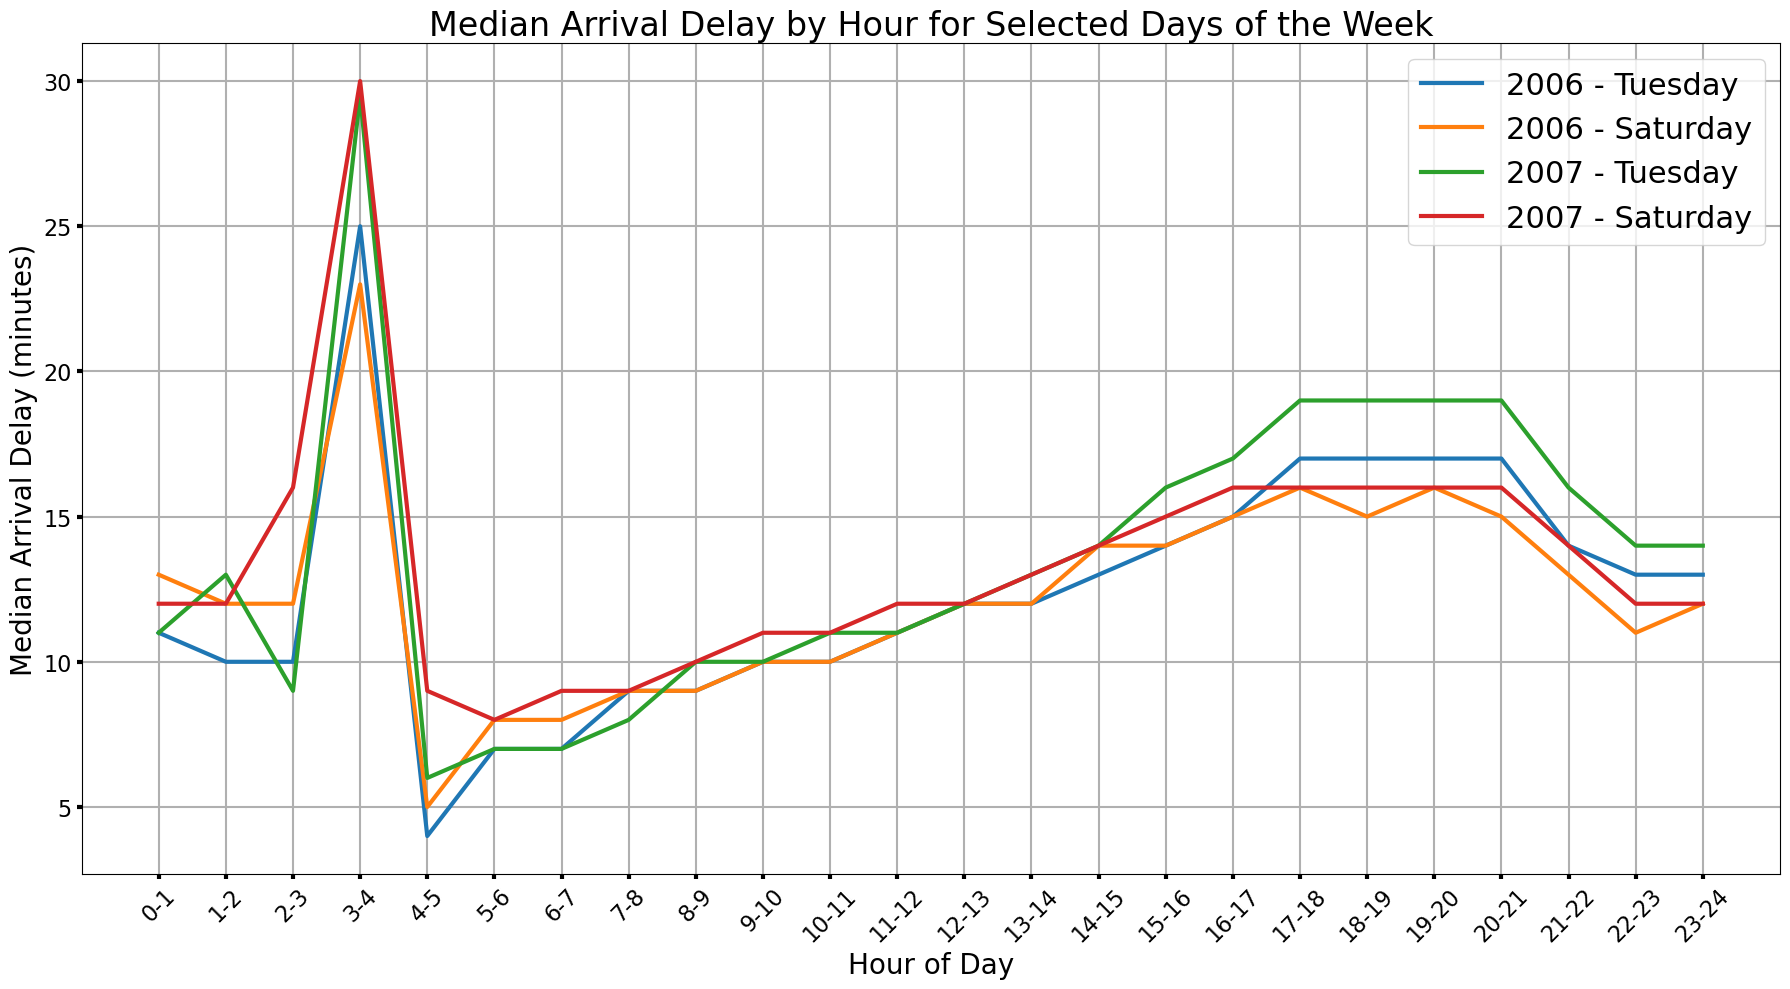

In [44]:
import matplotlib.pyplot as plt

days_inweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Defining the days in a week
plt.figure(figsize=(18, 10))

for year in [2006, 2007]:
    # Plot median arrival delay for both years
    for i, weekday in enumerate(days_inweek, start=1):
        # Filtering the data for the current year and selected days of the week
        
        if year == 2006 and i in [2, 6]:  
            # For 2006: Tuesday = 2 and Saturday = 6
            year_arrdata = q2a_arr_dataset[(q2a_arr_dataset['Year'] == year) & (q2a_arr_dataset['DayOfWeek'] == i)]
            
            
            median_arrdelay = year_arrdata.groupby('CRSDepTime')['ArrDelay'].median()
            # Calculate median arrival delay for each hour
            
            plt.plot(median_arrdelay.index, median_arrdelay.values, label=f'2006 - {weekday}', linewidth=3 )
            # Plot median arrival delay for year 2006
        elif year == 2007 and i in [2, 6]:  
            # For 2007: Tuesday = 2 and Saturday = 6
            year_arrdata = q2a_arr_dataset[(q2a_arr_dataset['Year'] == year) & (q2a_arr_dataset['DayOfWeek'] == i)]
            
            
            median_arrdelay = year_arrdata.groupby('CRSDepTime')['ArrDelay'].median()
            # Calculate median arrival delay for each hour
          
            plt.plot(median_arrdelay.index, median_arrdelay.values, label=f'2007 - {weekday}', linewidth=3 )
              # Plot median arrival delay for year 2007

plt.title('Median Arrival Delay by Hour for Selected Days of the Week', fontsize=24)
plt.xlabel('Hour of Day', fontsize=20)
plt.ylabel('Median Arrival Delay (minutes)', fontsize=20)
plt.grid(True, linestyle='-', linewidth=1.5)  # Thickening the grid lines
plt.legend(fontsize=22)
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=16, width=3)  # Thickening the axis ticks
# Set title and labels for median arrival delay

plt.tight_layout()
plt.show()


### - Median Departure Delay by Hour for Selected Days of the Week:

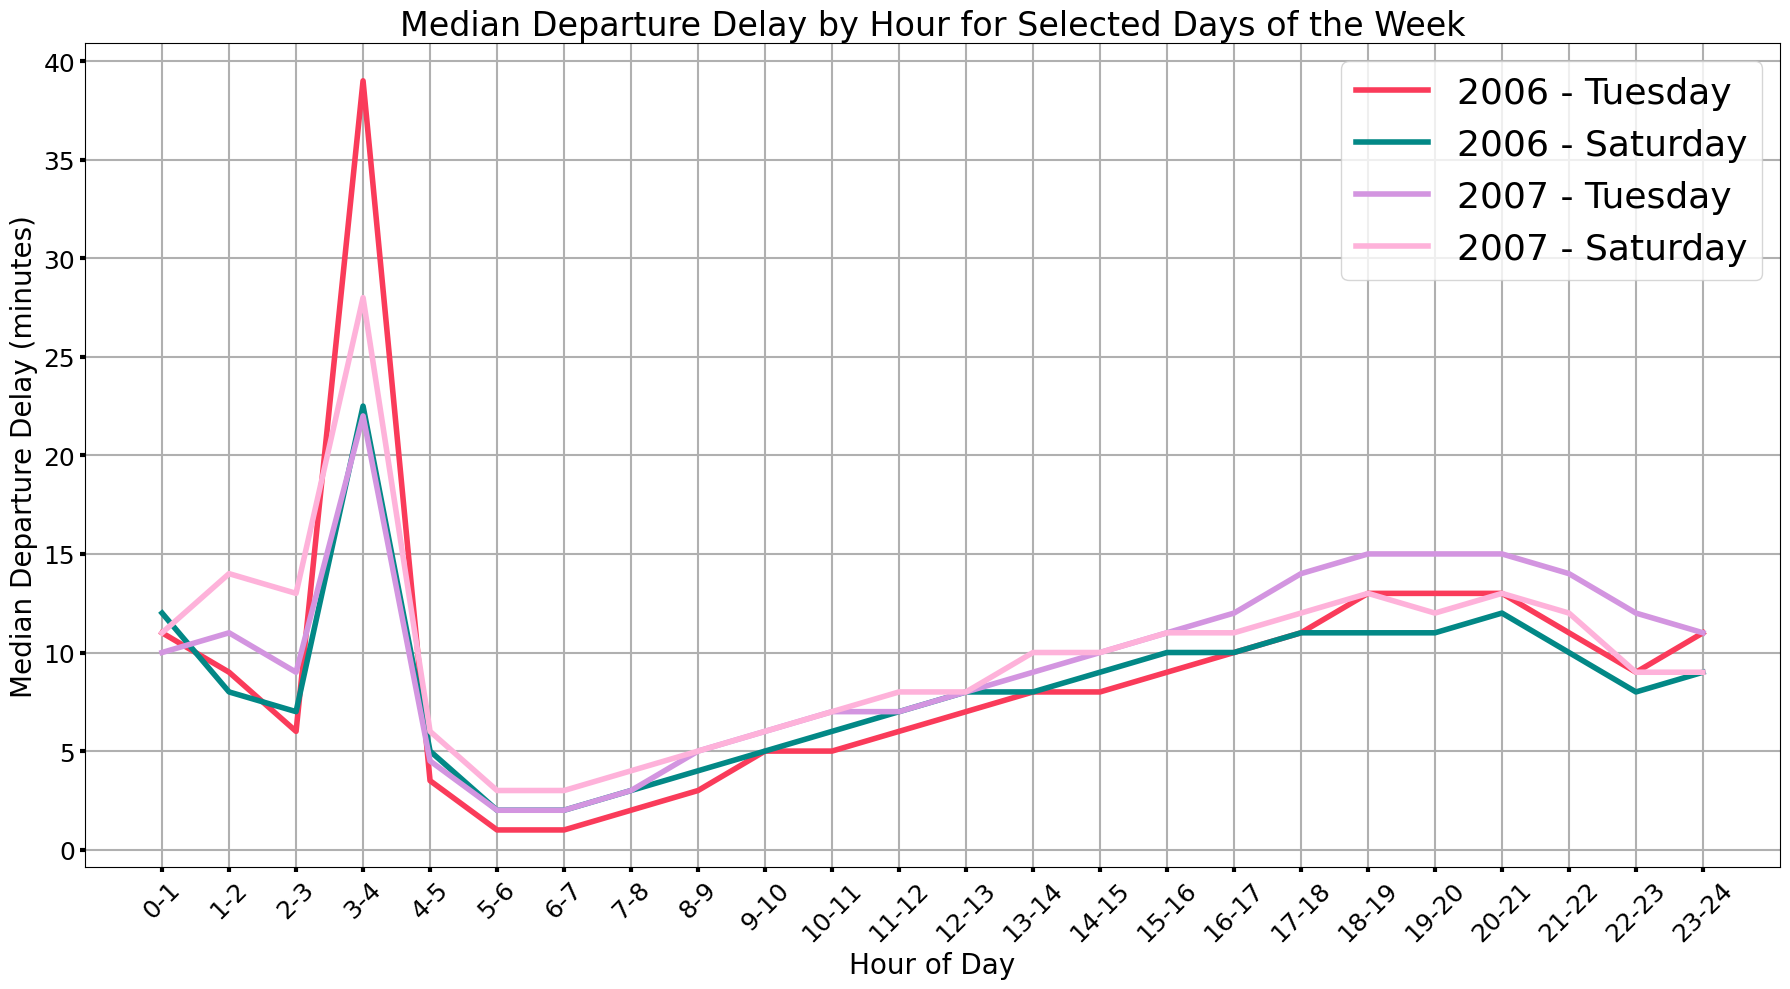

In [45]:
plt.figure(figsize=(18, 10))
# Plot median departure delay for both years

# Define custom colors for each combination of year and day
colors = {
    (2006, 2): '#fa3b5a',  # 2006 Tuesday
    (2006, 6): '#028886',  # 2006 Saturday
    (2007, 2): '#d395e0',  # 2007 Tuesday
    (2007, 6): '#feb2da'   # 2007 Saturday
}

for year in [2006, 2007]:
    for day, weekday in zip([2, 6], ['Tuesday', 'Saturday']):
        # Filter data for the current year and selected weekdays
        yr_depdata = q2a_dep_dataset[(q2a_dep_dataset['Year'] == year) & (q2a_dep_dataset['DayOfWeek'] == day)]
        
        med_depdelay_ = yr_depdata.groupby('CRSDepTime')['DepDelay'].median()
        # Calculate median departure delay for each hour
        
        plt.plot(med_depdelay_.index, med_depdelay_.values, label=f'{year} - {weekday}', linewidth=4, color=colors[(year, day)])
        # Plot median departure delay for both years using custom colors

plt.title('Median Departure Delay by Hour for Selected Days of the Week', fontsize=24)
plt.xlabel('Hour of Day', fontsize=20)
plt.ylabel('Median Departure Delay (minutes)', fontsize=20)
plt.grid(True, linestyle='-', linewidth=1.5)  
plt.legend(fontsize=26)
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=18, width=3)  
# Set title and labels for median departure delay

plt.tight_layout()
plt.show()
